### Class: Machine Learning <br> Date: 11/02/2018 <br> Mini-Project 2

### Members:
__Thomas Henderson__<br>
__Travis Hills__<br>
__Lucas Rufo__<br>
__Kyle Thomas__<br>

In [90]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
plt.rcParams["axes.grid"] = False


# Read in the data using Pandas

data = pd.read_csv("data/bezdekIris.csv")

# Separate lables and data
########## The labels used below have been added to the CSV file manually. Using loc and iloc 
########## seemed to fail in getting every sample, as the first was interpreted as the name of the column.

y = data["Class"].copy()
X = data.drop(["SW", "SL", "Class"], axis=1)

# Split the data into training and test sets. 
# By the 80-20 rule, 80% of the data is for training and 20% is reserved for testing.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [94]:
# Data has been split. 
# There are no null entires.
# Normalize data if needed.
# Train SVM models and compare them

svm_clf = Pipeline([
    ("scaler", StandardScaler()),
    ("linear_svc", SVC(kernel="linear", C=1))
    ])
svm_clf.fit(X_train, y_train)

# Make predictions
test_pred = svm_clf.predict(X_test)    # Parameters are petal length, petal width

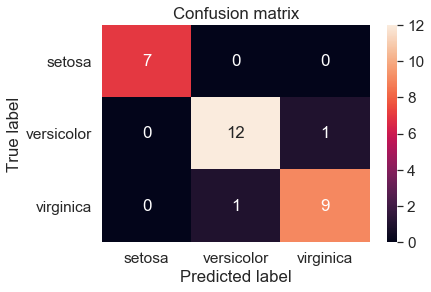

precision: 0.9
recall: 0.9
f1-score: 0.9


In [106]:
# Trained linear SVM Classifier
# Now evaluate predictions using the confusion matrix

from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
import seaborn as sns

# List containing names of flowers. Used when plotting confusion matrix.
class_names = ['setosa', 'versicolor', 'virginica']

# Plot confusion matrix

def plot_confusion_matrix(cm, classes,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    
    plt.title(title)
    ax = sns.heatmap(confusionMat, xticklabels=class_names, yticklabels=class_names, annot=True, fmt="d")
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    #plt.tight_layout()
    plt.yticks(rotation=0)
    plt.xticks(rotation=0)

# Calculate confusion matrix, plot it, and calculate precision; recall, and f1-score.
def evaluate(test_labels, pred):
    confusionMat = confusion_matrix(test_labels, pred)
    plot_confusion_matrix(confusionMat, classes=class_names, title='Confusion matrix')
    plt.show()

    # Compute the precision
    precision = precision_score(test_labels, pred, average="micro")
    recall = recall_score(test_labels, pred, average="micro")
    f1 = f1_score(test_labels, pred, average="micro")
    print("precision: " + str(precision))
    print("recall: " + str(recall))
    print("f1-score: " + str(f1))


evaluate(y_test, test_pred)